In [1]:
from random import gauss, random, randint
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

![title](double_qlearning_task.png)

## Инициализация нулями

### жадно

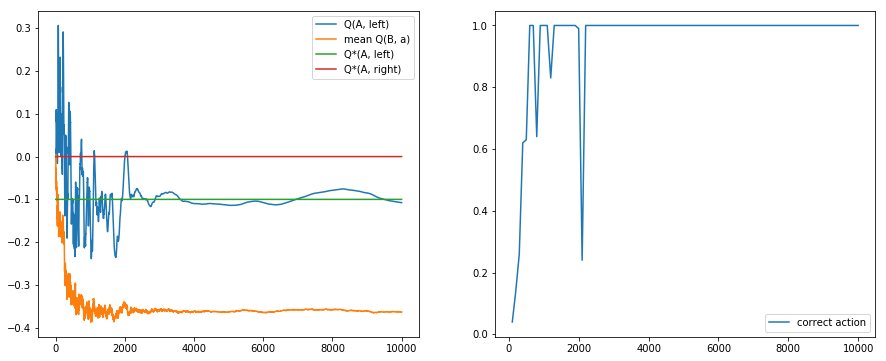

In [8]:
act = lambda: gauss(-0.1, 1)
Q_0 = 0 # начальное состояние, из которого есть только один переход
Qs = [0 for _ in range(10)] # Q значения действий из B
max_rewards = []
mean_rewards = []
Q_0s = []
xs = []
correct_ratios = []

alpha = 0.1
eps = 0.1
decay = 0.999

for i in range(10000):
    
    alpha = max(alpha*decay, 0.001)
    Q_0 = (1 - alpha) * Q_0 + alpha * np.max(Qs)
    Q_0s.append(Q_0)
    
    a = np.argmax(Qs)
        
    r = act()
    Qs[a] = (1 - alpha) * Qs[a] + alpha * r

    m = np.max(Qs)
    max_rewards.append(m)
    mean_rewards.append(np.mean(Qs))
#     if i % 1000 == 999:
#         ratio = sum([q < 0 for q in Q_0s[-1000:]]) / len([q < 0 for q in Q_0s[-1000:]])
#         correct_ratios.append(ratio)
#         xs.append(i)
        
    k = 100
    if i % k == k-1:
        actions = [q < 0 for q in Q_0s[-k:]]
        ratio = sum(actions) / len(actions)
        correct_ratios.append(ratio)
        xs.append(i)
    
# plt.plot(max_rewards, label = 'max Q')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))


ax[0].plot(Q_0s, label = 'Q(A, left)')
ax[0].plot(mean_rewards, label = 'mean Q(B, a)')
ax[0].plot([-0.1]*len(max_rewards), label = 'Q*(A, left)')
ax[0].plot([0]*len(max_rewards), label = 'Q*(A, right)')
ax[1].plot(xs, correct_ratios, label = 'correct action')

ax[0].legend()
ax[1].legend()

### уменьшим жадность

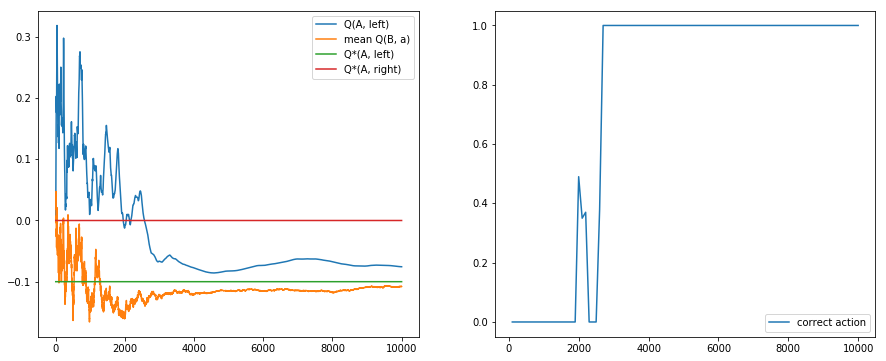

In [20]:
act = lambda: gauss(-0.1, 1)
Q_0 = 0 # начальное состояние, из которого есть только один переход
Qs = [0 for _ in range(10)]
max_rewards = []
mean_rewards = []
Q_0s = []
xs = []
correct_ratios = []

alpha = 0.1
eps = 0.8
decay = 0.999

for i in range(10000):
    
    alpha = max(alpha*decay, 0.001)
    Q_0 = (1 - alpha) * Q_0 + alpha * np.max(Qs)
    Q_0s.append(Q_0)
    
    
    if random() > eps:
        a = np.argmax(Qs)
    else:
        a = randint(0, len(Qs)-1)
        
    r = act()
    Qs[a] = (1 - alpha) * Qs[a] + alpha * r

    m = np.max(Qs)
    max_rewards.append(m)
    mean_rewards.append(np.mean(Qs))
    k = 100
    if i % k == k-1:
        actions = [q < 0 for q in Q_0s[-k:]]
        ratio = sum(actions) / len(actions)
        correct_ratios.append(ratio)
        xs.append(i)
    
# plt.plot(max_rewards, label = 'max Q')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))


ax[0].plot(Q_0s, label = 'Q(A, left)')
ax[0].plot(mean_rewards, label = 'mean Q(B, a)')
ax[0].plot([-0.1]*len(max_rewards), label = 'Q*(A, left)')
ax[0].plot([0]*len(max_rewards), label = 'Q*(A, right)')
ax[1].plot(xs, correct_ratios, label = 'correct action')

ax[0].legend()
ax[1].legend()

### Double Q-Learning

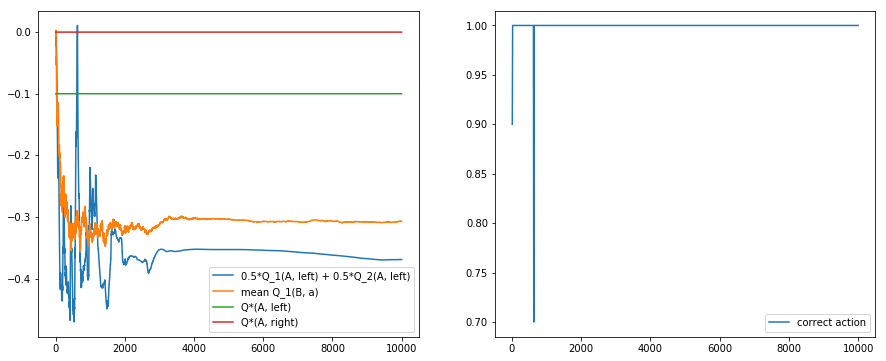

In [30]:
act = lambda: gauss(-0.1, 1)
n = 10
Q_1 = 0 # начальное состояние, из которого есть только один переход
Q_2 = 0
Qs_1 = [0 for _ in range(n)] # второе состояние, ведущее в терминальное
Qs_2 = [0 for _ in range(n)]
max_rewards = []
mean_rewards = []
Q_1s = []
Q_2s = []
xs = []
correct_ratios = []
alpha = 0.1
eps = 0.9
decay = 0.999

for i in range(10000):
    
    alpha = max(alpha*decay, 0.001)
    
    if random() > 0.5:
        Q_1 = (1 - alpha) * Q_1 + alpha * Qs_2[np.argmax(Qs_1)]
    else:
        Q_2 = (1 - alpha) * Q_2 + alpha * Qs_1[np.argmax(Qs_2)]
        
    Q_1s.append(Q_1)
    Q_2s.append(Q_2)
    
    
    if random() > 0:
        a = np.argmax([q1+q2 for q1, q2 in zip(Qs_1, Qs_2)])
    else:
        a = randint(0, n-1) 
    r = act()
    
    if random() > 0.5:
        Qs_1[a] = (1 - alpha) * Qs_1[a] + alpha * r
    else:
        Qs_2[a] = (1 - alpha) * Qs_2[a] + alpha * r    
    
    
    m = np.max(Qs_1)
    max_rewards.append(m)
    mean_rewards.append(np.mean(Qs_1))
    
    k = 10
    if i % k == k-1:
        actions = [(q1+q2)<0 for q1, q2 in zip(Q_1s[-k:], Q_2s[-k:])]
        ratio = sum(actions) / len(actions)
        correct_ratios.append(ratio)
        xs.append(i)

Q_0s =  [(q1+q2)/2 for q1, q2 in zip(Q_1s, Q_2s)]     
        
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))


ax[0].plot(Q_0s, label = '0.5*Q_1(A, left) + 0.5*Q_2(A, left)')
ax[0].plot(mean_rewards, label = 'mean Q_1(B, a)')
ax[0].plot([-0.1]*len(max_rewards), label = 'Q*(A, left)')
ax[0].plot([0]*len(max_rewards), label = 'Q*(A, right)')
ax[1].plot(xs, correct_ratios, label = 'correct action')

ax[0].legend()
ax[1].legend()

# Инициализация распределением

# без наворотов

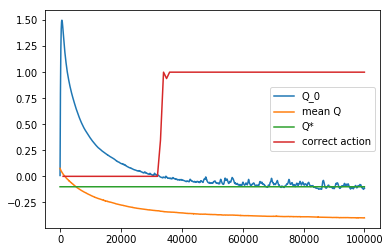

In [5]:
act = lambda: gauss(-0.1, 1)
Q_0 = 0 # начальное состояние, из которого есть только один переход
Qs = [act() for _ in range(100)]
max_rewards = []
mean_rewards = []
Q_0s = []
xs = []
correct_ratios = []
alpha = 0.003

for i in range(100000):
    Q_0 = (1 - alpha) * Q_0 + alpha * np.max(Qs)
    Q_0s.append(Q_0)
    
    a = np.argmax(Qs)
    r = act()
    Qs[a] = (1 - alpha) * Qs[a] + alpha * r

    m = np.max(Qs)
    max_rewards.append(m)
    mean_rewards.append(np.mean(Qs))
    
    if i % 1000 == 999:
        ratio = sum([q < 0 for q in Q_0s[-1000:]]) / len([q < 0 for q in Q_0s[-1000:]])
        correct_ratios.append(ratio)
        xs.append(i)
# plt.plot(max_rewards, label = 'max Q')
plt.plot(Q_0s, label = 'Q_0')
plt.plot(mean_rewards, label = 'mean Q')
plt.plot([-0.1]*len(max_rewards), label = 'Q*')
plt.plot(xs, correct_ratios, label = 'correct action')
plt.legend()

# уменьшим жадность

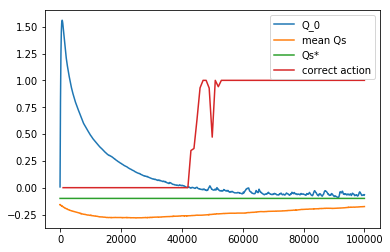

In [6]:
act = lambda: gauss(-0.1, 1)
Q_0 = 0 # начальное состояние, из которого есть только один переход
Qs = [act() for _ in range(100)]
max_rewards = []
mean_rewards = []
Q_0s = []
xs = []
correct_ratios = []
alpha = 0.003
eps = 0.6

for i in range(100000):
    Q_0 = (1 - alpha) * Q_0 + alpha * np.max(Qs)
    Q_0s.append(Q_0)
    
    
    if random() > eps:
        a = np.argmax(Qs)
    else:
        a = randint(0, len(Qs)-1)
        
    r = act()
    Qs[a] = (1 - alpha) * Qs[a] + alpha * r

    m = np.max(Qs)
    max_rewards.append(m)
    mean_rewards.append(np.mean(Qs))
    if i % 1000 == 999:
        ratio = sum([q < 0 for q in Q_0s[-1000:]]) / len([q < 0 for q in Q_0s[-1000:]])
        correct_ratios.append(ratio)
        xs.append(i)
    
# plt.plot(max_rewards, label = 'max Q')
plt.plot(Q_0s, label = 'Q_0')
plt.plot(mean_rewards, label = 'mean Qs')
plt.plot([-0.1]*len(max_rewards), label = 'Qs*')
plt.plot(xs, correct_ratios, label = 'correct action')
plt.legend()

### Double Q-Learning

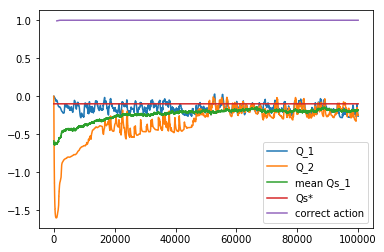

In [7]:
act = lambda: gauss(-0.1, 1)
n = 10
Q_1 = 0 # начальное состояние, из которого есть только один переход
Q_2 = 0
Qs_1 = [act() for _ in range(n)] # второе состояние, ведущее в терминальное
Qs_2 = [act() for _ in range(n)]
max_rewards = []
mean_rewards = []
Q_1s = []
Q_2s = []
xs = []
correct_ratios = []
alpha = 0.01
eps = 0.1

for i in range(100000):
    
    if random() > 0.5:
        Q_1 = (1 - alpha) * Q_1 + alpha * Qs_2[np.argmax(Qs_1)]
    else:
        Q_2 = (1 - alpha) * Q_2 + alpha * Qs_1[np.argmax(Qs_2)]
        
    Q_1s.append(Q_1)
    Q_2s.append(Q_2)
    
    
    if random() > eps:
        a = np.argmax([q1+q2 for q1, q2 in zip(Qs_1, Qs_2)])
    else:
        a = randint(0, n-1) 
    r = act()
    
    if random() > 0.5:
        Qs_1[a] = (1 - alpha) * Qs_1[a] + alpha * r
    else:
        Qs_2[a] = (1 - alpha) * Qs_2[a] + alpha * r    
    
    
    m = np.max(Qs_1)
    max_rewards.append(m)
    mean_rewards.append(np.mean(Qs_1))
    if i % 1000 == 999:
        actions = [(q1+q2)<0 for q1, q2 in zip(Q_1s[-1000:], Q_2s[-1000:])]
        ratio = sum(actions) / len(actions)
        correct_ratios.append(ratio)
        xs.append(i)
    
# plt.plot(max_rewards, label = 'max Q')
plt.plot(Q_1s, label = 'Q_1')
plt.plot(Q_2s, label = 'Q_2')
plt.plot(mean_rewards, label = 'mean Qs_1')
plt.plot([-0.1]*len(max_rewards), label = 'Qs*')
plt.plot(xs, correct_ratios, label = 'correct action')
plt.legend()